# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [9]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
base = pd.read_csv("dummies.csv", sep=";")
base.head(3)
#base.drop("Unnamed: 0", axis=1, inplace=True)
#base.head(3)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,0,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,0,False,...,True,False,False,True,False,True,False,False,False,False


In [3]:
base.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


In [4]:
x = base.drop('mau', axis=1)
y = base.mau
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=76)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13320 entries, 6045 to 2721
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              13320 non-null  int64  
 1   idade                                   13320 non-null  float64
 2   tempo_emprego                           13320 non-null  float64
 3   possui_celular                          13320 non-null  int64  
 4   possui_fone_comercial                   13320 non-null  int64  
 5   possui_fone                             13320 non-null  int64  
 6   possui_email                            13320 non-null  int64  
 7   qt_pessoas_residencia                   13320 non-null  float64
 8   sexo_M                                  13320 non-null  bool   
 9   posse_de_veiculo_Y                      13320 non-null  bool   
 10  posse_de_imovel_Y                       13320 non-null  bool 

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

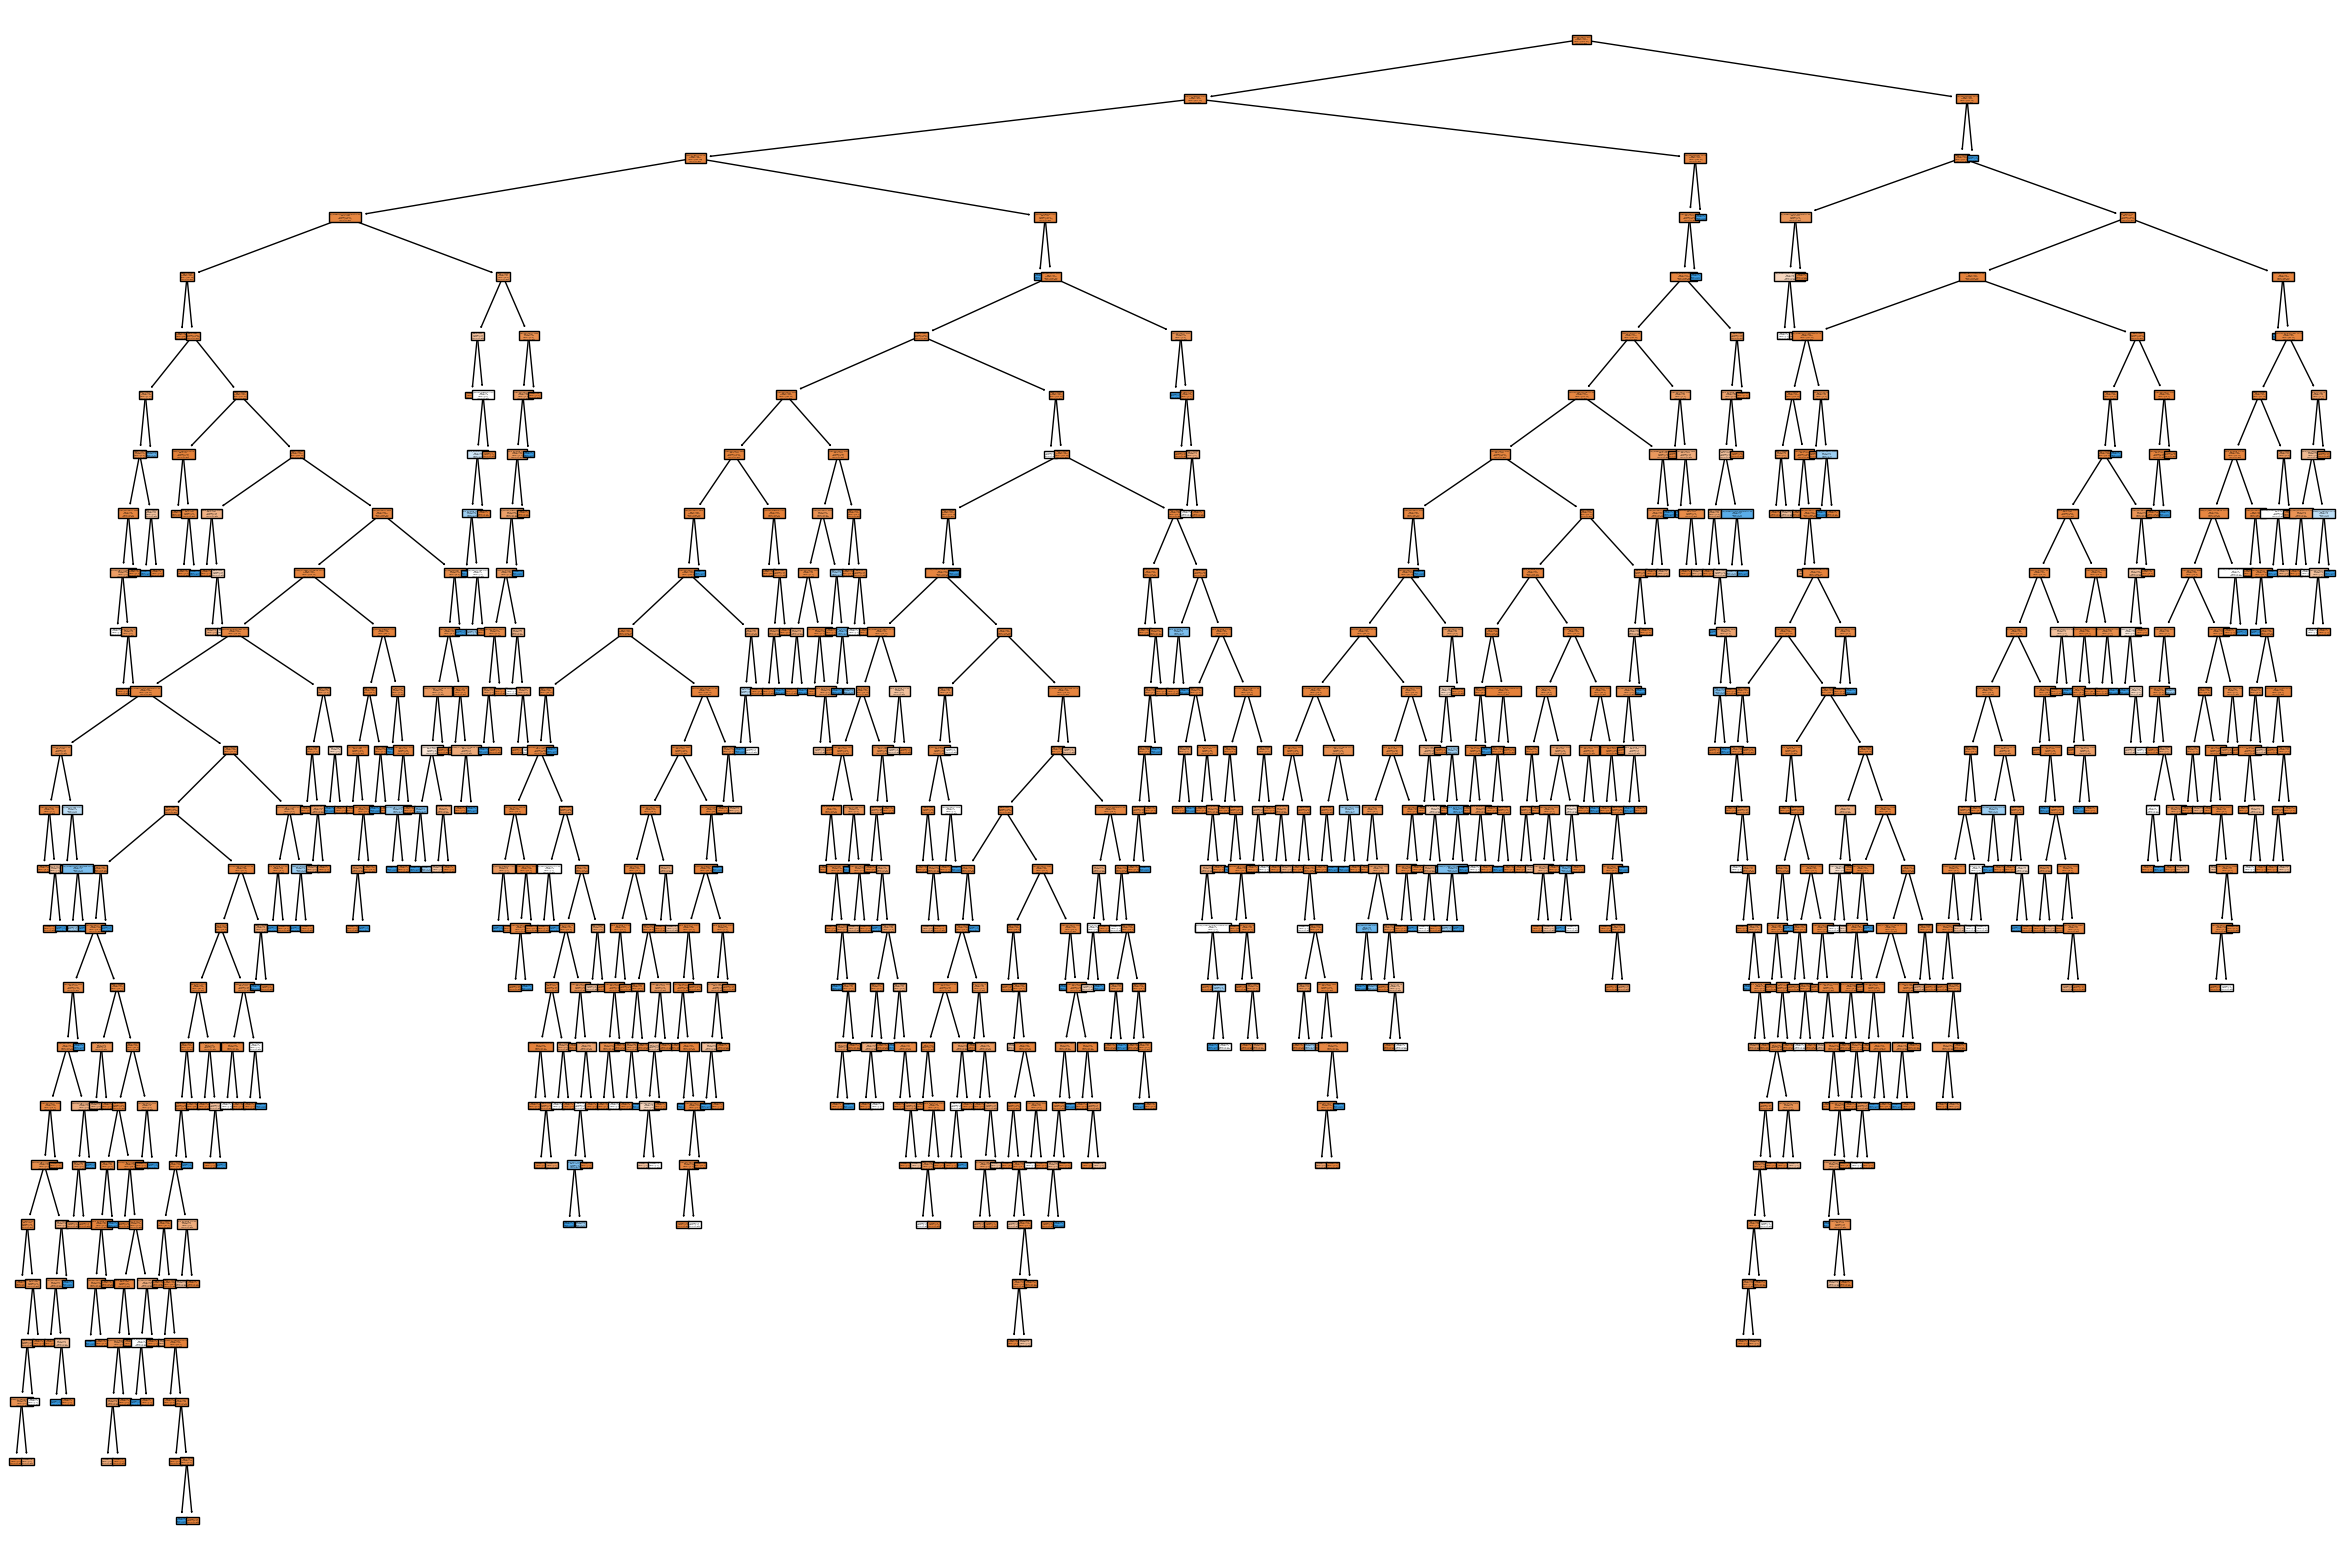

In [5]:
clf = tree.DecisionTreeClassifier(random_state=111)
clf = clf.fit(x_train,y_train)
plt.figure(figsize=(30, 20))  # Aumenta o tamanho do gráfico
tree.plot_tree(clf, filled=True, feature_names=x_train.columns, class_names=["Não Mau", "Mau"])
plt.show()

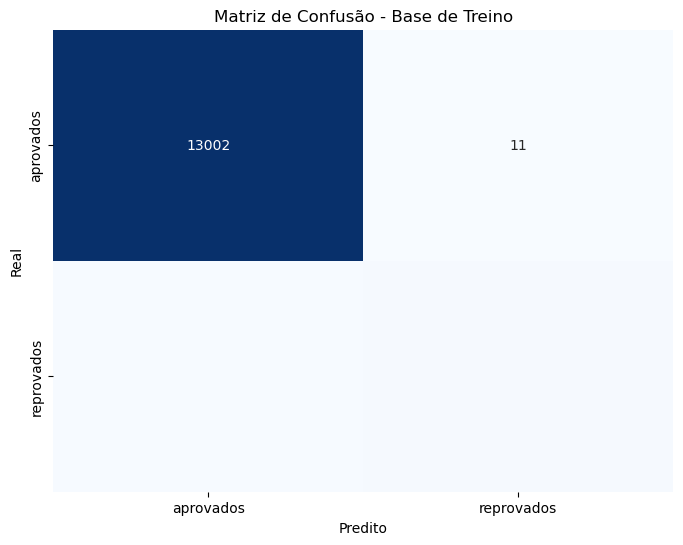

In [6]:
y_train_predict = clf.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['aprovados', 'reprovados'], 
            yticklabels=['aprovados', 'reprovados'])

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Treino')
plt.show()

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

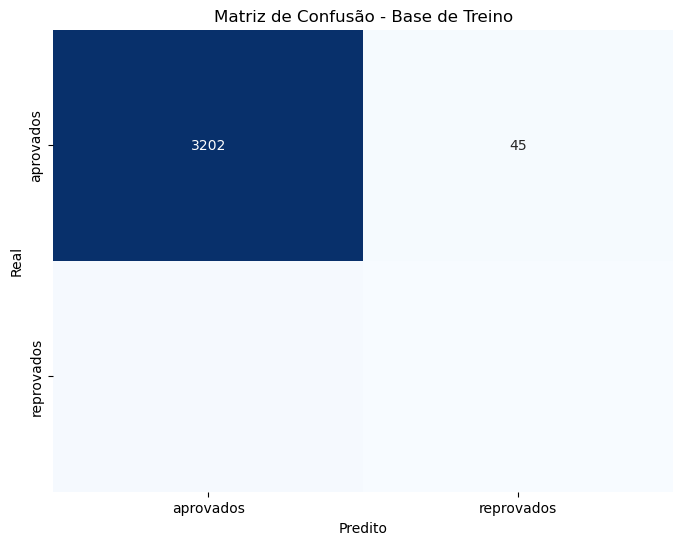

In [7]:
y_test_predict = clf.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['aprovados', 'reprovados'], 
            yticklabels=['aprovados', 'reprovados'])

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Treino')
plt.show()

In [11]:
#Calculando acurácia teste
acuracia_test = accuracy_score(y_test, y_test_predict)
print(acuracia_test)

acuracia_train = accuracy_score(y_train, y_train_predict)
print(acuracia_train)

0.9672672672672673
0.9909159159159159


A acuracia da base de treinamento é quase de 100%, isso indica que os dados estão overfitados, e por ser de treinamento, ele lidou muito bem com aqueles dados, mas não estaria preparado para dados novos, e isso se mostra quando aplicamos na base de teste, que já temos uma pequena reduzida na acuracia, por termos dados que o modelo ainda não conhece

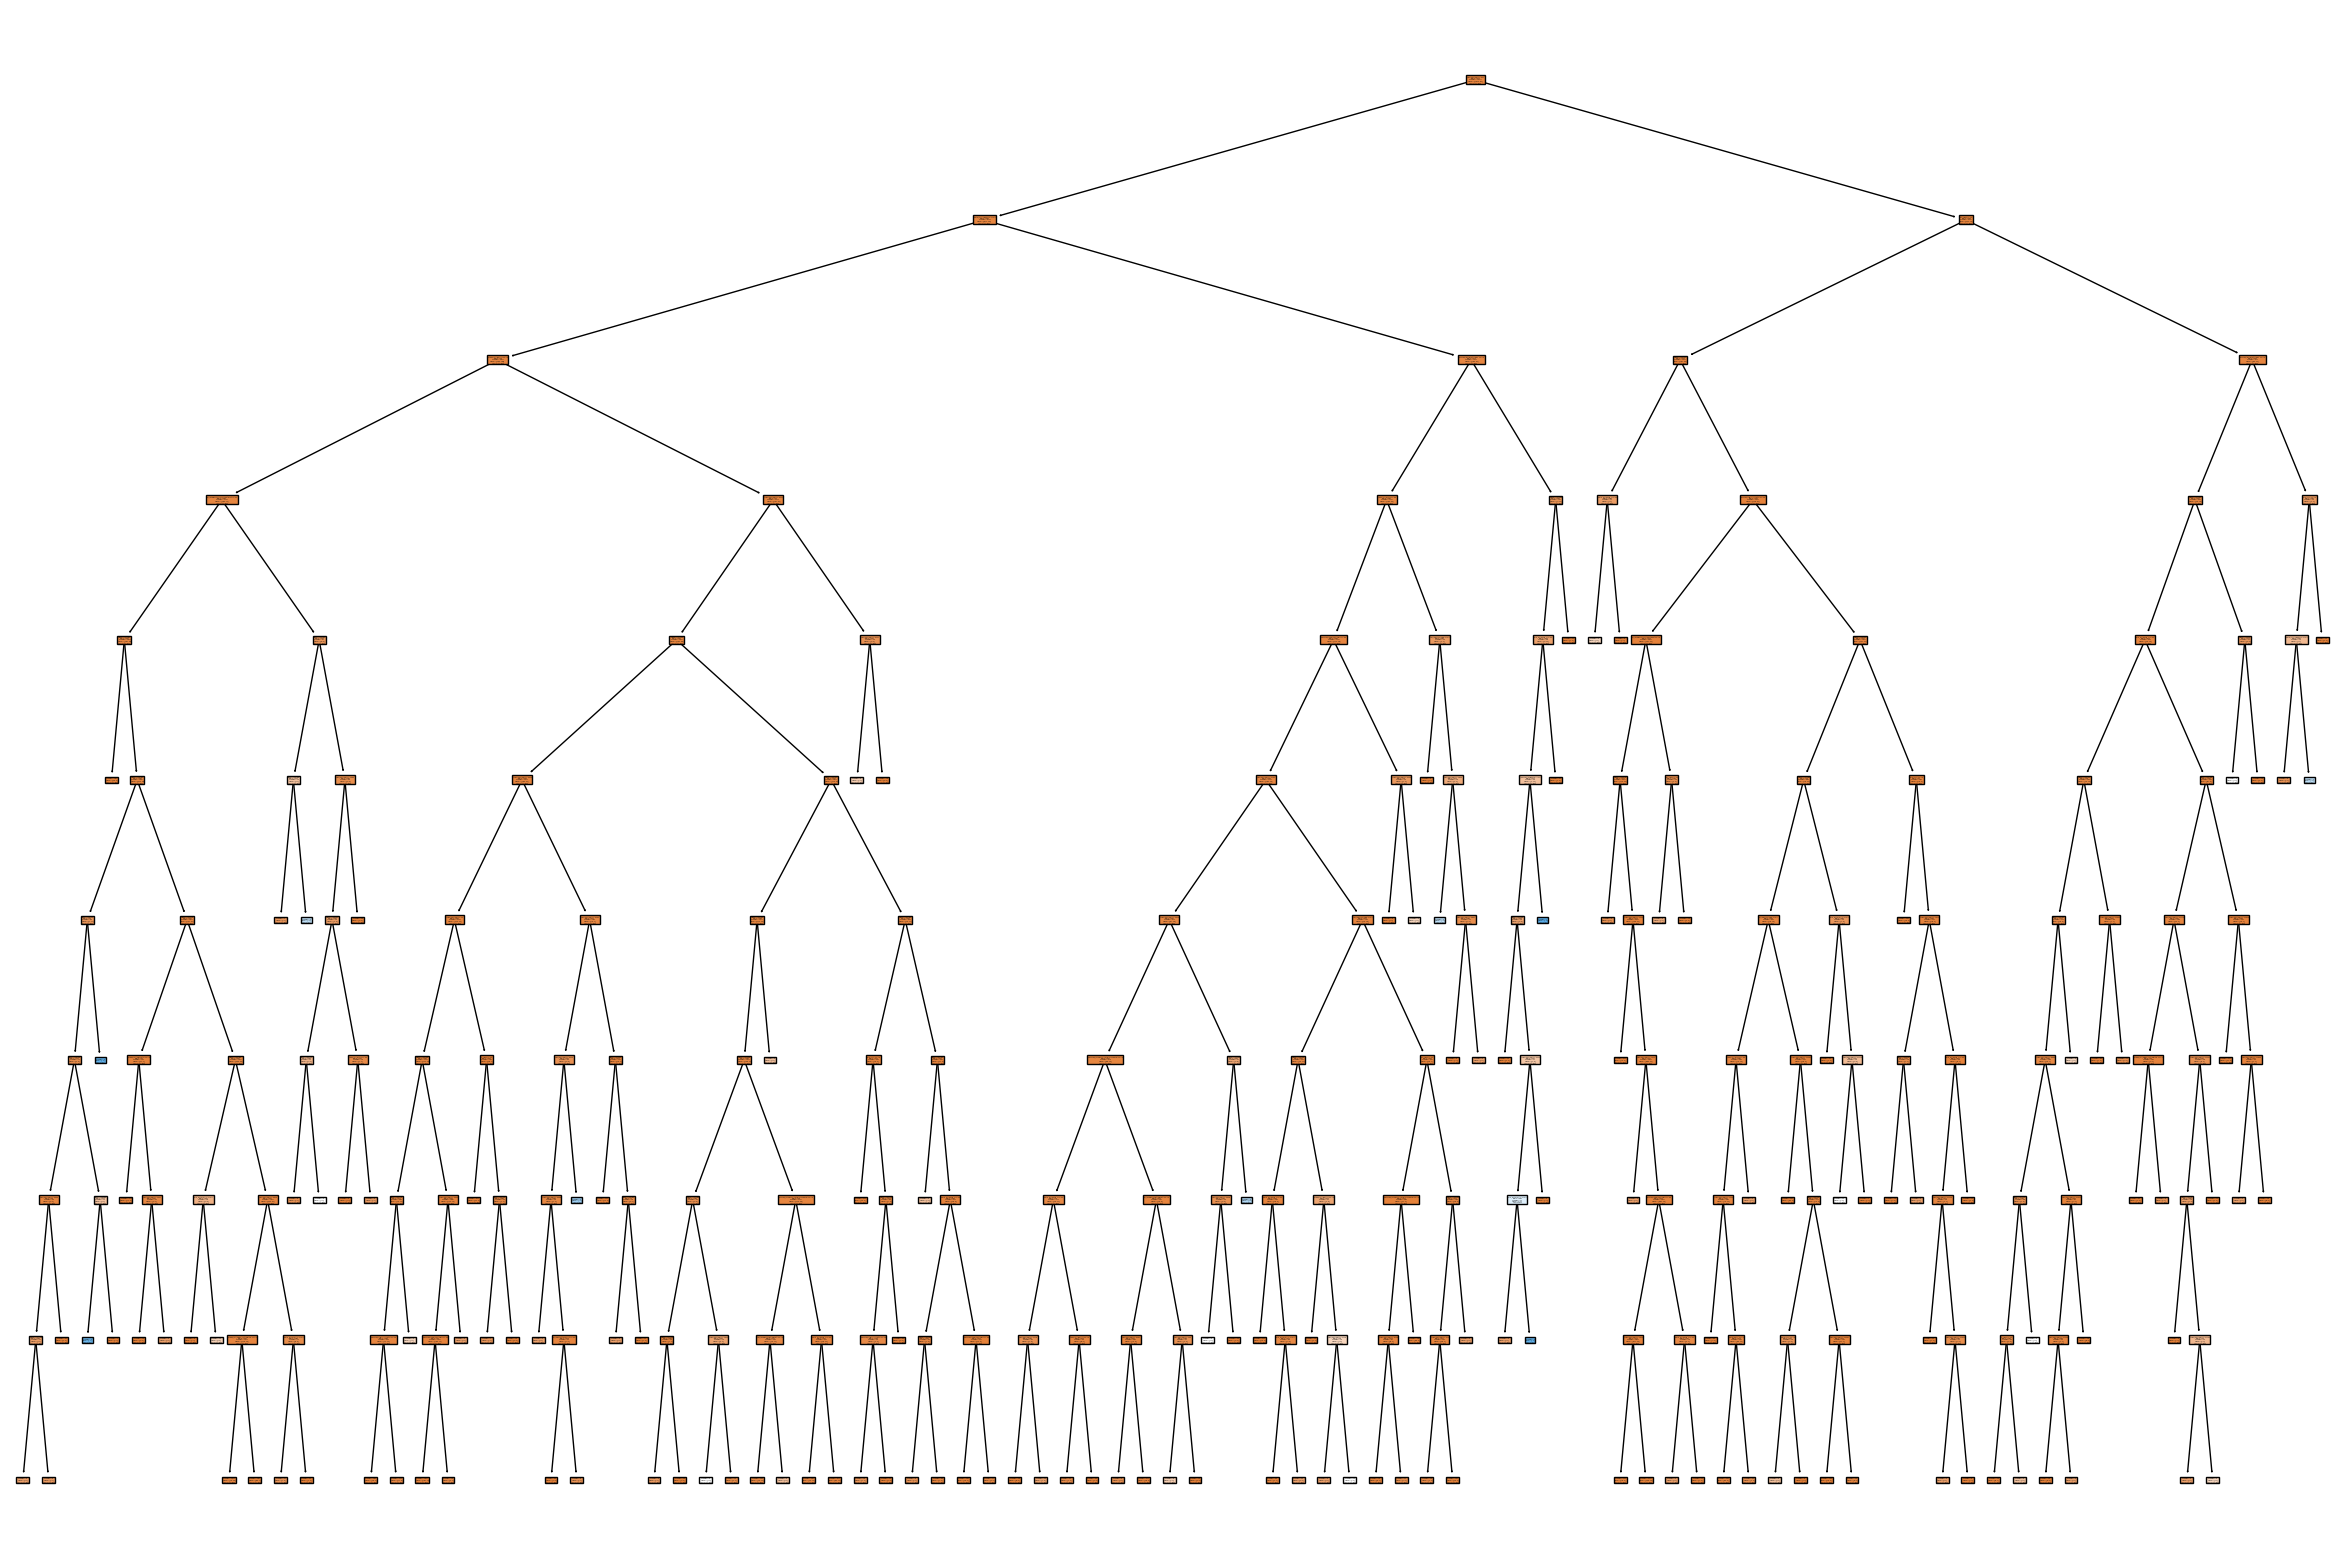

In [12]:
clf_2 = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5,random_state=123)
clf_2 = clf_2.fit(x_train,y_train)
plt.figure(figsize=(30, 20))  # Aumenta o tamanho do gráfico
tree.plot_tree(clf_2, filled=True, feature_names=x_train.columns, class_names=["Não Mau", "Mau"])
plt.show()

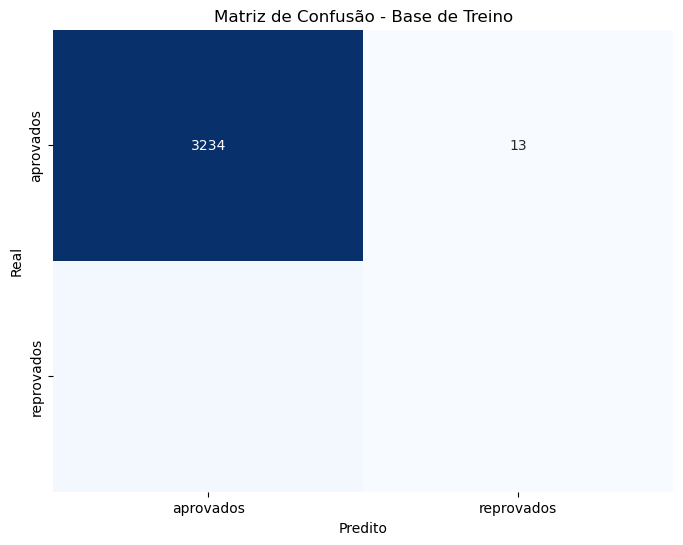

In [13]:
y_test_predict_2 = clf_2.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_predict_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['aprovados', 'reprovados'], 
            yticklabels=['aprovados', 'reprovados'])

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Treino')
plt.show()

In [14]:
acuracia_test_2 = accuracy_score(y_test, y_test_predict_2)
print(acuracia_test_2)

0.9726726726726727


Com base no novo modelo, nós temos uma acuracia de 97%, sendo assim, da base total, 13 registros foram classificados como mau pagador